In [151]:
#Keras
from tensorflow import keras

# Import of keras model and hidden layers for CNN
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

681


In [152]:
IMG_SIZE=128
X=[]
y=[]
for i, image in enumerate(imagepaths):
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('input\\pothole-detection-dataset\\normal')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

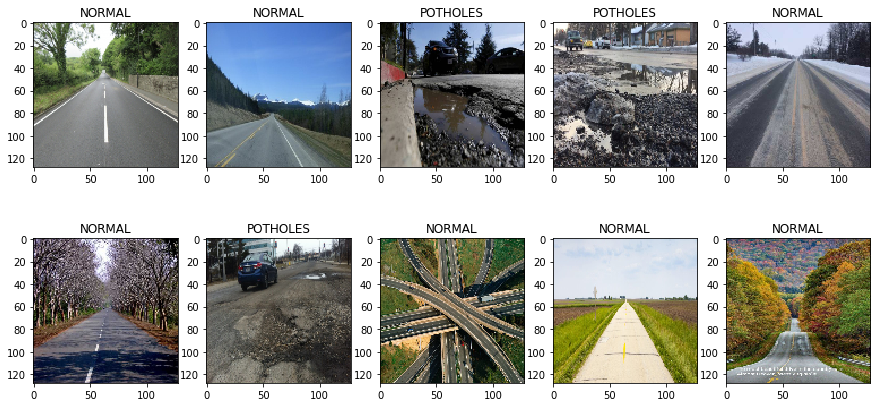

In [153]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [165]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
X=np.array(X)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)
y_train = y_train[:,1]
y_test = y_test[:,1]

In [166]:
# Create a CNN Sequential Model
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'tanh', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='tanh')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='tanh')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='tanh')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [167]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [168]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 12, 12, 128)       147584    
__________

In [169]:
model.fit(x_train, y_train, epochs=9, batch_size=16, verbose=1, 
         validation_data=(x_test, y_test))

Train on 510 samples, validate on 170 samples
Epoch 1/9
510/510 [==============================] - 48s 95ms/step - loss: 0.6876 - acc: 0.6412 - val_loss: 0.7123 - val_acc: 0.6765
Epoch 2/9
510/510 [==============================] - 47s 92ms/step - loss: 0.5053 - acc: 0.7667 - val_loss: 0.4055 - val_acc: 0.8353
Epoch 3/9
510/510 [==============================] - 47s 92ms/step - loss: 0.3937 - acc: 0.8333 - val_loss: 0.4100 - val_acc: 0.8294
Epoch 4/9
510/510 [==============================] - 47s 92ms/step - loss: 0.3591 - acc: 0.8490 - val_loss: 0.3458 - val_acc: 0.8471
Epoch 5/9
510/510 [==============================] - 47s 93ms/step - loss: 0.3242 - acc: 0.8588 - val_loss: 0.3162 - val_acc: 0.8824
Epoch 6/9
510/510 [==============================] - 47s 92ms/step - loss: 0.3055 - acc: 0.8686 - val_loss: 0.3540 - val_acc: 0.8706
Epoch 7/9
510/510 [==============================] - 47s 93ms/step - loss: 0.3566 - acc: 0.8510 - val_loss: 0.3038 - val_acc: 0.9118
Epoch 8/9
510/510 [====

In [170]:
loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

170/170 [==============================] - 7s 41ms/step
Test accuracy: 85.29%


In [171]:
# Making predictions on test data
prediction = model.predict(x_test)

In [172]:
#Transform predictions into 1D array 
y_pred = np.array(np.where(prediction>0.5, 1, 0))
pred = []
for l in y_pred:
    for element in l:
        pred.append(element)

In [173]:
y_test=y_test.astype(bool)
y_pred = np.array(pred).astype(bool)
tp = sum(y_test & y_pred)
tn = sum(~y_test & ~y_pred)
fn = sum(y_test & ~y_pred)
fp = sum(~y_test & y_pred)

In [174]:
#Create a Confusion Matrix for Evaluation
conMatrix = pd.DataFrame('conMatrix', columns=["Actual POTHOLE", "Actual NORMAL"],index=["Predicted POTHOLE", "Predicted NORMAL"])
conMatrix['Actual NORMAL']['Predicted NORMAL'] = tn
conMatrix['Actual NORMAL']['Predicted POTHOLE'] = fn
conMatrix['Actual POTHOLE']['Predicted NORMAL'] = fp
conMatrix['Actual POTHOLE']['Predicted POTHOLE'] = tp
print(conMatrix)

                  Actual POTHOLE Actual NORMAL
Predicted POTHOLE             73            15
Predicted NORMAL              10            72
